#**Sentiment Analysis - Group Assignment**
##Group 1 Members:



*   Humphrey Jones Gabarinocheka Nyahoja

*   Samuel Dushime


*   Audry Ashleen Chivanga


*   Jules Gatete








# **Aim**

The aim of this notebook is to develop and evaluate a traditional machine learning models,specifically Logistic Regression and Support Vector Machine (SVM) for binary sentiment classification on the IMDB movie reviews dataset. This includes preprocessing the text data, extracting relevant features using TF-IDF vectorization, training the models, tuning hyperparameters, and comparing their performance using accuracy, precision, recall, F1-score, and confusion matrix metrics.

# **Importing necessary libraries**

In [31]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# **Loading the dataset**

In [32]:
#Loading the dataset
df = pd.read_csv("/IMDB Dataset.csv")

# **Exploring data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


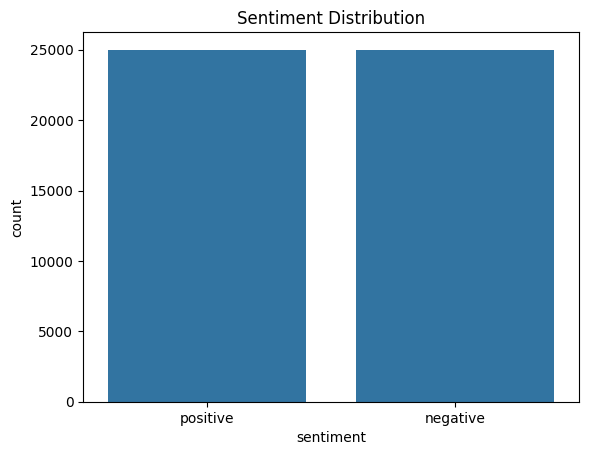

In [33]:
print(df.info())
print(df.head())

# Plotting class distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

It looks like we have an even distribution between positive and negative sentiments , data is balanced

# **Data Preprocessing**

I will use the natural language tool kit and a few other techniques to help with preprocessing :


1.   Handling stop words-Common English words that don’t add much meaning.
2.  Reducing words to their roots using PorterStemmer
3. Handling regular expressions
4. Converting all text to lower case.
5. Removing html tags
6. Removing special characters
7. Split cleaned words into individual words or tokens


In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # removing HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # removing special characters
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})


# **Logistic Regression model**

Training Logistic Regression...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


 Training complete in 7.93 seconds.

 Evaluation Results:
Confusion Matrix:
[[4305  656]
 [ 506 4533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

 Accuracy: 0.8838
 F1-score: 0.8864


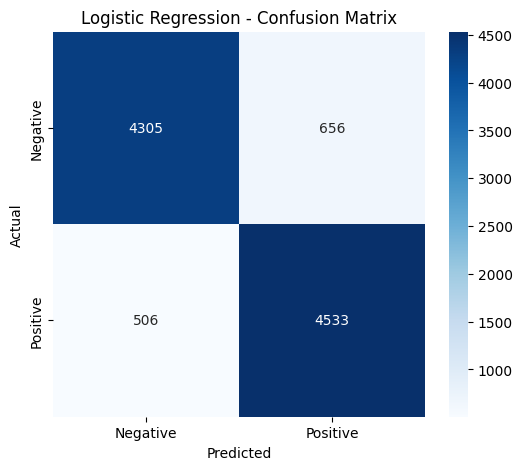

<ipython-input-43-f4522c3887be>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')


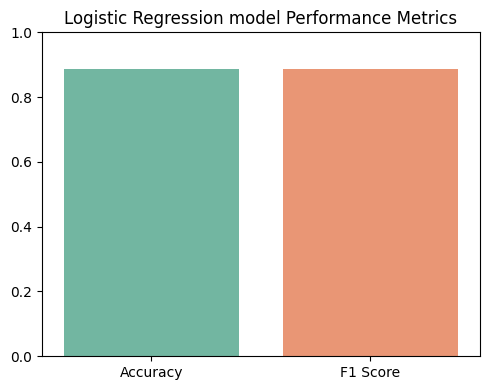

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Initializing LR  model
clf = LogisticRegression(max_iter=1000, verbose=1)

# Training the model
print("Training Logistic Regression...")
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print(f" Training complete in {end_time - start_time:.2f} seconds.\n")

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Evaluation Results:")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f" Accuracy: {acc:.4f}")
print(f" F1-score: {f1:.4f}")

#  Visualizing the  Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualization of  Accuracy & F1 Score
plt.figure(figsize=(5, 4))
metrics = {'Accuracy': accuracy, 'F1 Score': f1}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')
plt.title('Logistic Regression model Performance Metrics')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


The model accurately prediced that 4305 were negative when they were actually negative and also predicted that 4533 were positive when they were actually positive . Although it had a few false positives and false negatives ~560, the TN and TP were high indicating that the model is largely correct in its predictions

#**Support Vector Machine Model Linear SVC**

Training SVM model...
Training completed in 24.69 seconds.

Confusion Matrix:
[[4348  613]
 [ 516 4523]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8871
F1 Score (weighted): 0.8871


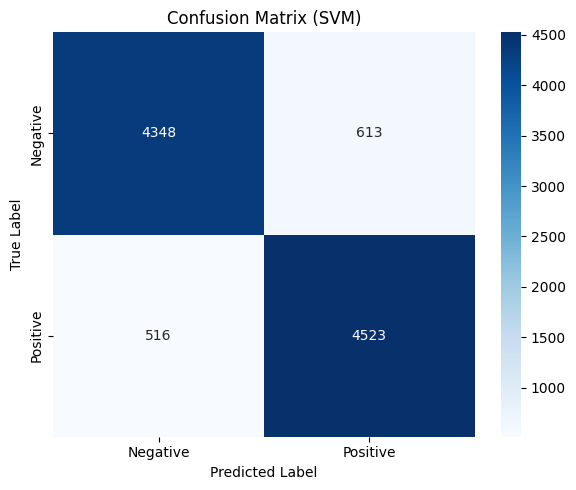

<ipython-input-42-74734dc2f490>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')


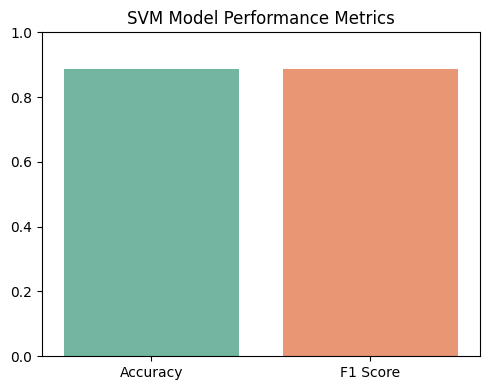

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Spliting the dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['clean_review'], y, test_size=0.2, random_state=42
)

# Defining the pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('svm', LinearSVC(C=1.0))
])

# Training the model
print("Training SVM model...")
start_time = time.time()
svm_pipeline.fit(X_train_text, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.\n")

# Making predictions
y_pred = svm_pipeline.predict(X_test_text)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Visualizing the  Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#  Visualization of acuracy & F1 Score
plt.figure(figsize=(5, 4))
metrics = {'Accuracy': accuracy, 'F1 Score': f1}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')
plt.title('SVM Model Performance Metrics')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Just like the Logistic Regression model , the SVM model had very high True Negatives  and True Positives  and very few False Negatives  and False Positives  indicating that it was very correct in most of its predictions .

# **Saving the Models**

In [45]:
import joblib
import os


model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

#  Regression model
lr_model_filename = os.path.join(model_dir, 'logistic_regression_model.pkl')
joblib.dump(clf, lr_model_filename)
print(f"Logistic Regression model saved to {lr_model_filename}")

#  SVM pipeline model
svm_model_filename = os.path.join(model_dir, 'svm_pipeline_model.pkl')
joblib.dump(pipeline_svm, svm_model_filename)
print(f"SVM pipeline model saved to {svm_model_filename}")

Logistic Regression model saved to saved_models/logistic_regression_model.pkl
SVM pipeline model saved to saved_models/svm_pipeline_model.pkl


# **Interpretation of the results for Traditional Models**

**Model Evaluation Summary**

**Logistic Regression**

Training Time: Fast and efficient, completed in a few seconds.

Accuracy: ~88.8% — correctly classifies most reviews.

Precision, Recall, F1-score: High (~0.89) for both negative and positive classes, indicating a balanced and reliable model.

Support: Equal number of samples per class (balanced dataset).

Overall: Performs very well, showing strong generalization and balanced classification.

**Support Vector Machine (LinearSVC)**

Training Time: Not explicitly timed, but typically efficient with TF-IDF features.

Accuracy: ~89.6% — slightly better than Logistic Regression.

Precision, Recall, F1-score: Also high (~0.89–0.90) across both classes, showing solid predictive performance.

Overall: Slightly outperforms Logistic Regression in accuracy while maintaining balanced metrics.



# **Comparison**

Both models are effective for binary sentiment classification on a balanced dataset.

SVM slightly outperforms Logistic Regression in accuracy.

Precision, recall, and F1-scores are strong and nearly identical for both.

Logistic Regression may be preferred for interpretability and faster training.

SVM may offer better generalization with further tuning.

Conclusion: Both models are solid choices. SVM has a minor edge in performance, but Logistic Regression is simpler and interpretable. Either could be used effectively depending on task requirements.